In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [122]:
df = pd.read_csv('../data/MPS/agg_filtered_boroughs_weekends.csv')

In [123]:
df['TimePeriod'] = pd.to_datetime(df['TimePeriod'])

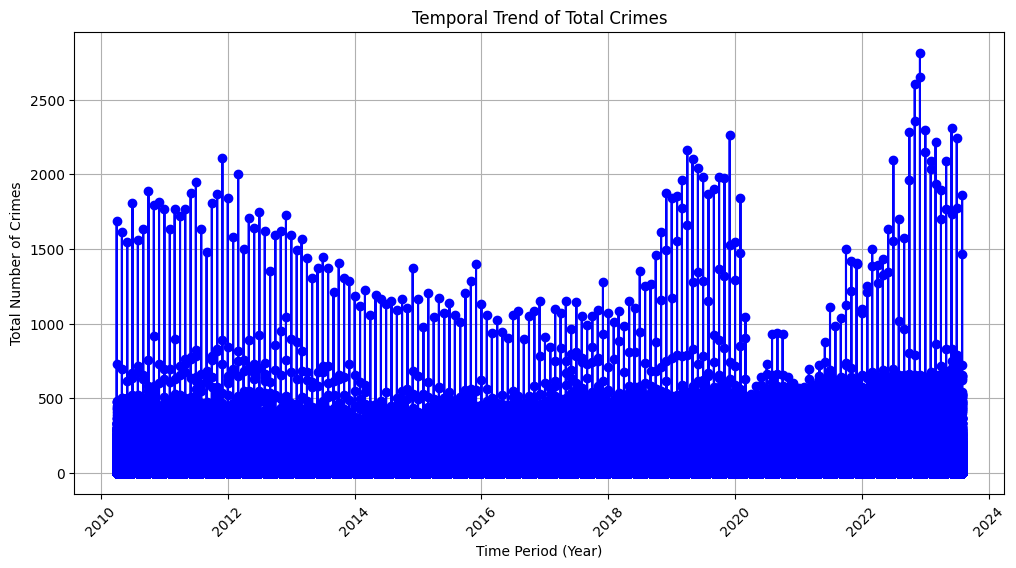

In [124]:
plt.figure(figsize=(12, 6))
plt.plot(df['TimePeriod'], df['Value'], marker='o', linestyle='-', color='b')
plt.title('Temporal Trend of Total Crimes')
plt.xlabel('Time Period (Year)')
plt.ylabel('Total Number of Crimes')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [125]:
df.set_index('TimePeriod', inplace=True)

In [127]:
df['Year'] = df.index.year
df['Month'] = df.index.month

In [130]:
monthly_crime_data = df.groupby(['Year', 'Month']).sum()

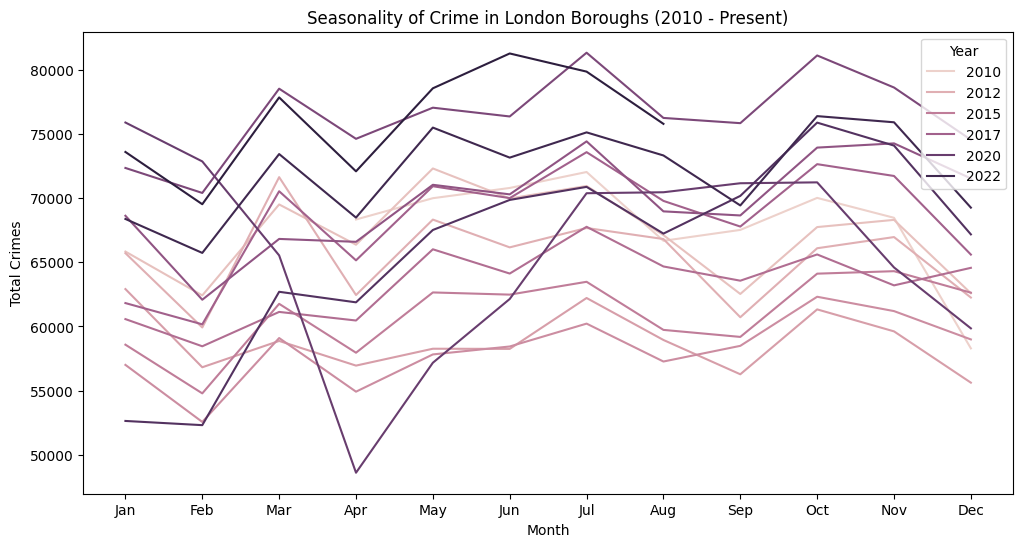

In [131]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Value', hue='Year', data=monthly_crime_data)
plt.title('Seasonality of Crime in London Boroughs (2010 - Present)')
plt.xlabel('Month')
plt.ylabel('Total Crimes')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', loc='upper right')
plt.show()

In [160]:
crime_seasonality = df.groupby(['CrimeType', 'Month'])['Value'].mean().reset_index()
crime_seasonality_pivot = crime_seasonality.pivot(index='Month', columns='CrimeType', values='Value')

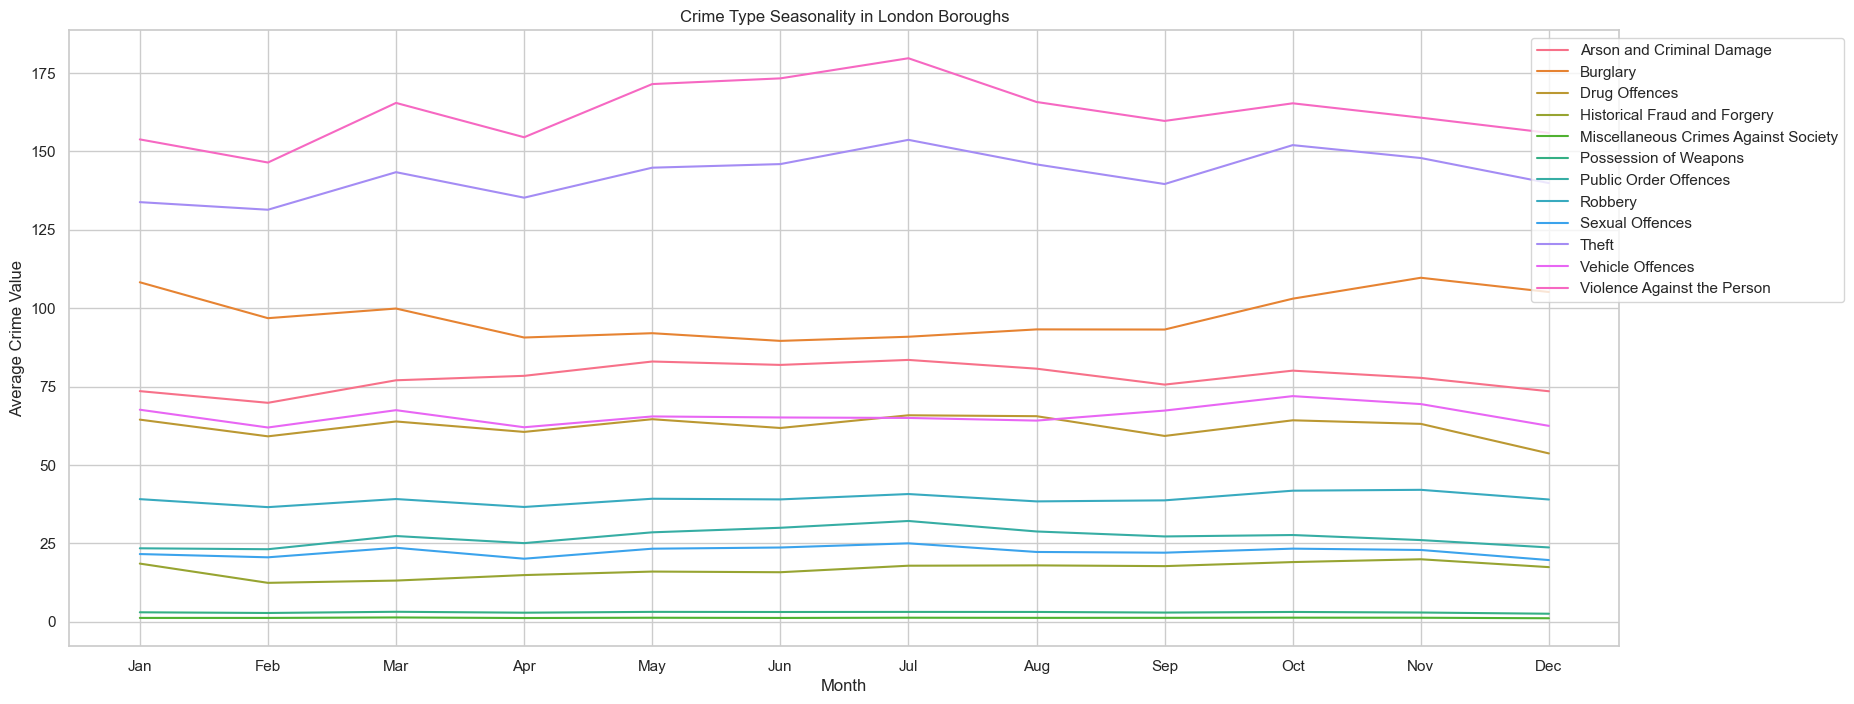

In [149]:
plt.figure(figsize=(20, 8))
sns.set(style="whitegrid")
sns.lineplot(data=crime_seasonality_pivot, dashes=False)
plt.title('Crime Type Seasonality in London Boroughs')
plt.xlabel('Month')
plt.ylabel('Average Crime Value')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [135]:
sub_crime_seasonality = df.groupby(['CrimeSubtype', 'Month'])['Value'].mean().reset_index()
sub_crime_seasonality_pivot = sub_crime_seasonality.pivot(index='Month', columns='CrimeSubtype', values='Value')

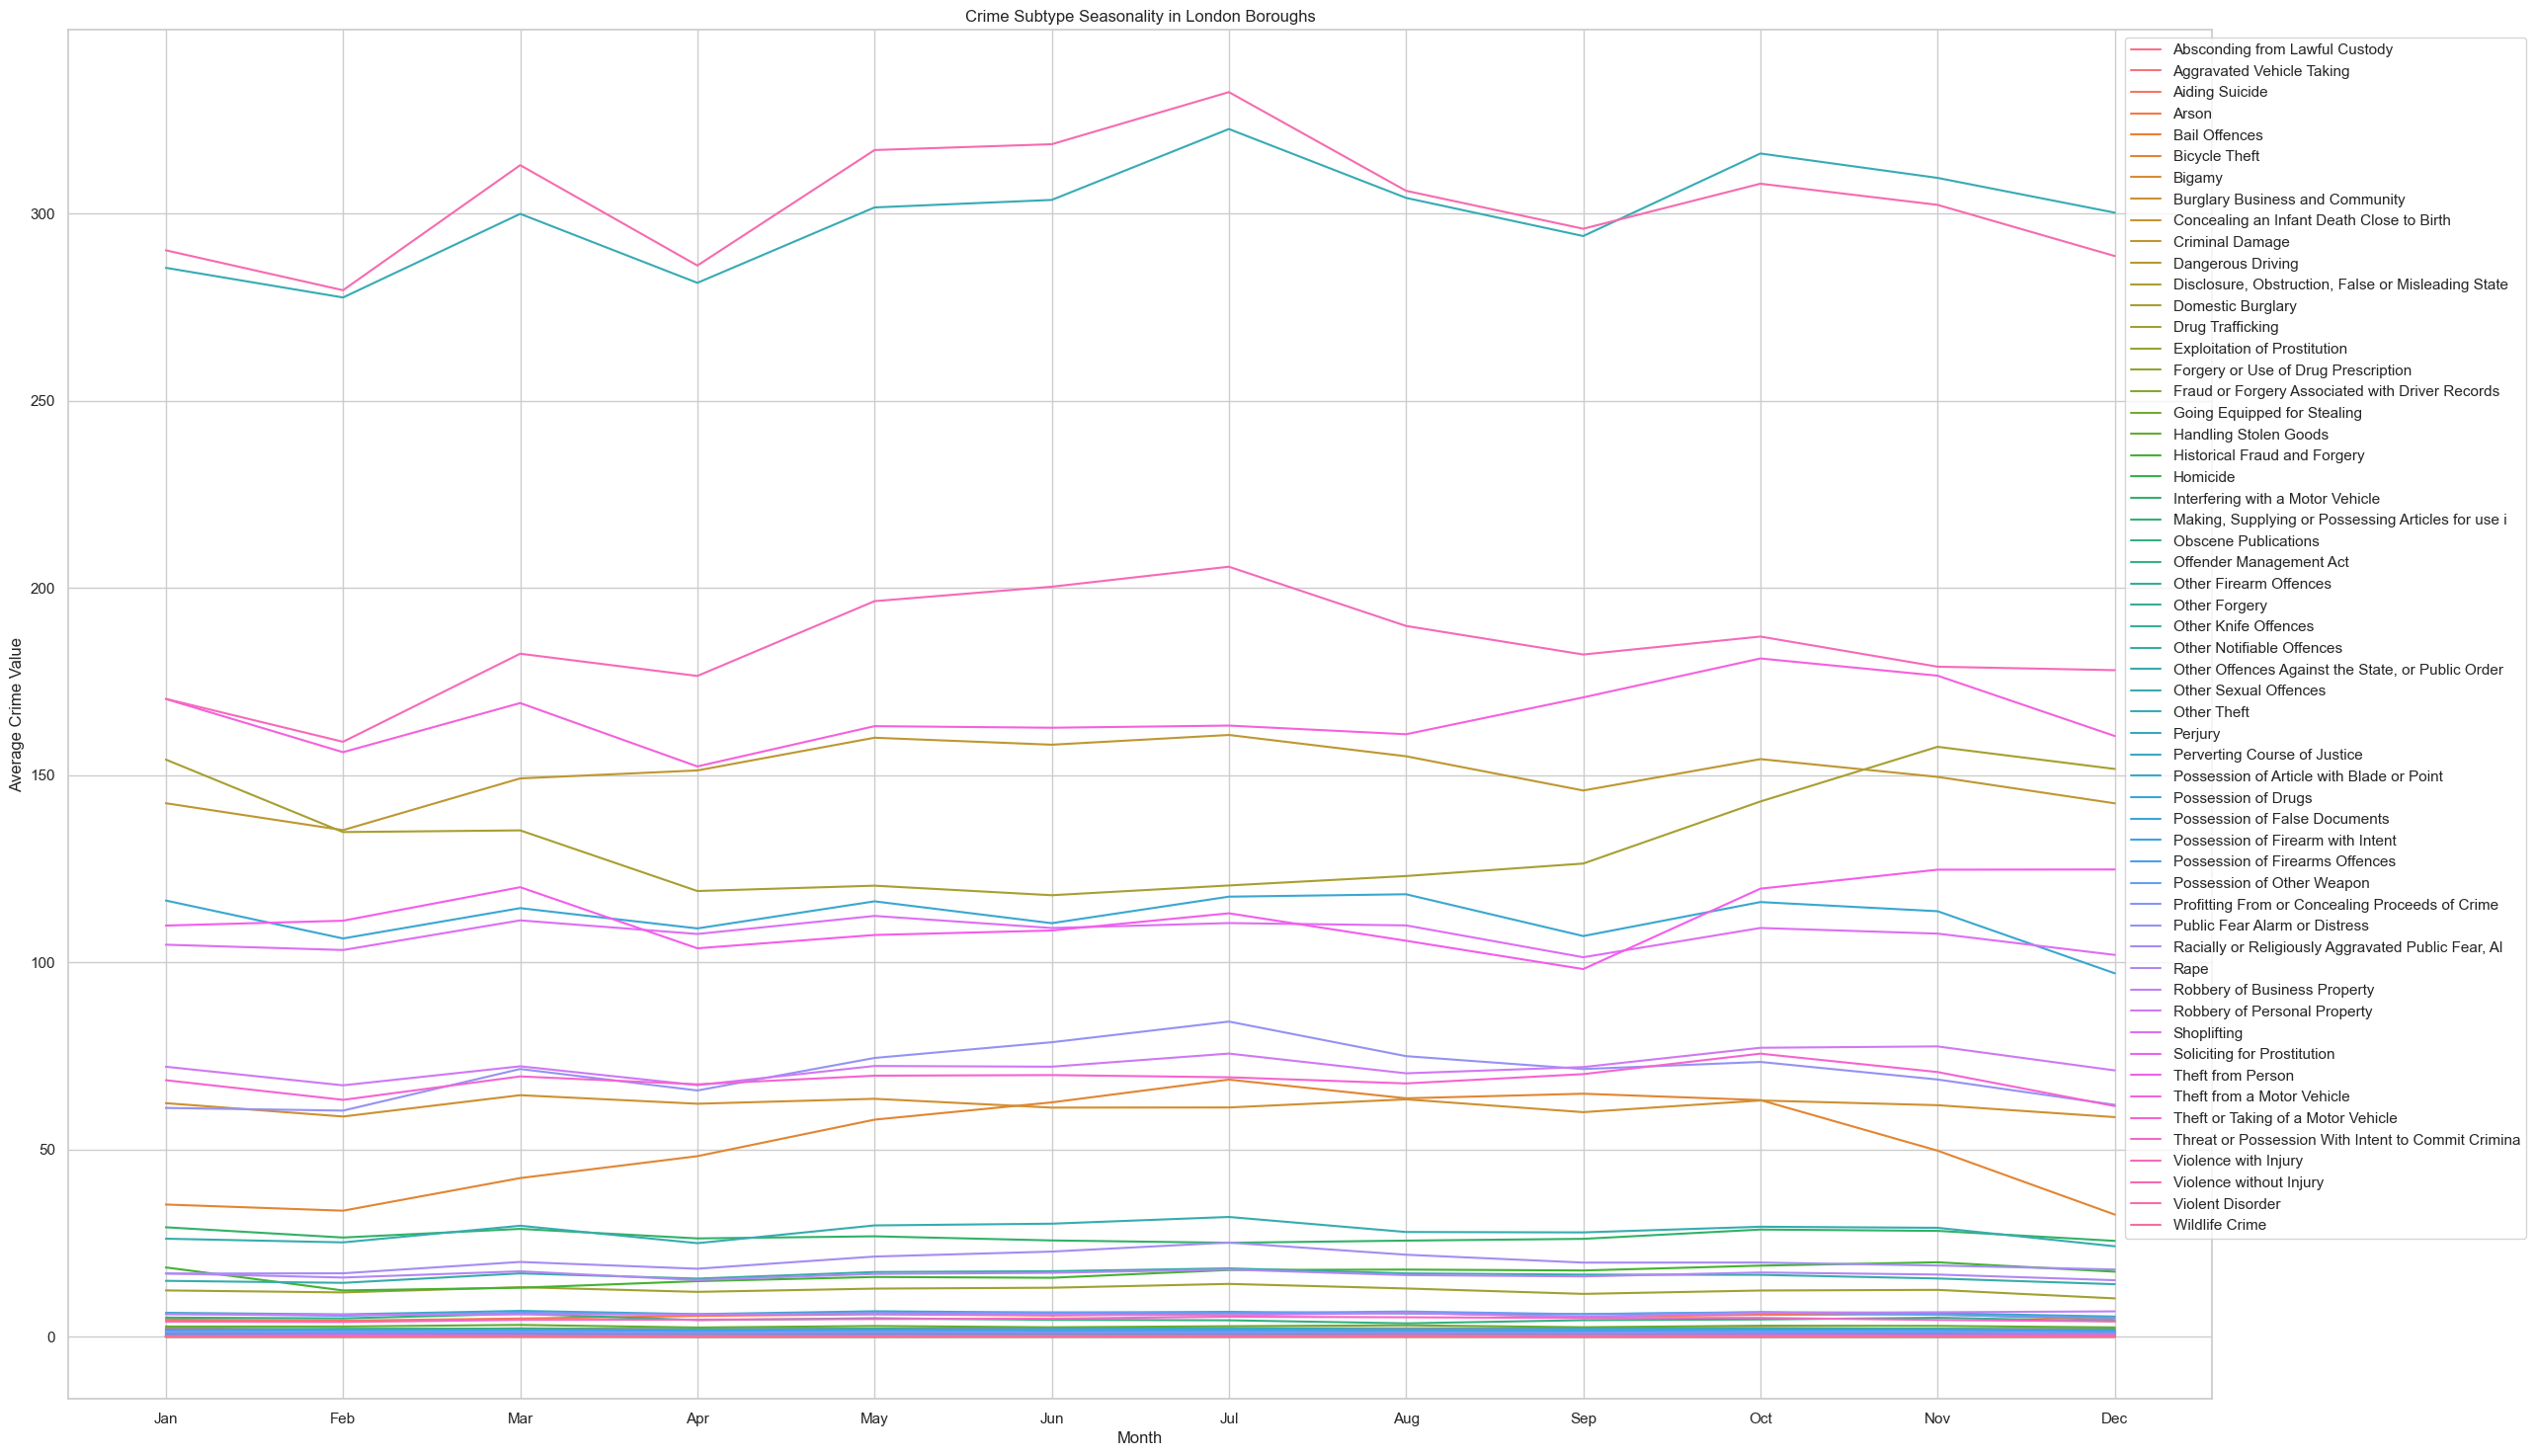

In [146]:
plt.figure(figsize=(28, 18))
sns.set(style="whitegrid")
sns.lineplot(data=sub_crime_seasonality_pivot, dashes=False)
plt.title('Crime Subtype Seasonality in London Boroughs')
plt.xlabel('Month')
plt.ylabel('Average Crime Value')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [154]:
borough_crime_rates = df.groupby('BoroughName')['Value'].mean().reset_index()
borough_crime_rates_sorted = borough_crime_rates.sort_values(by='Value')

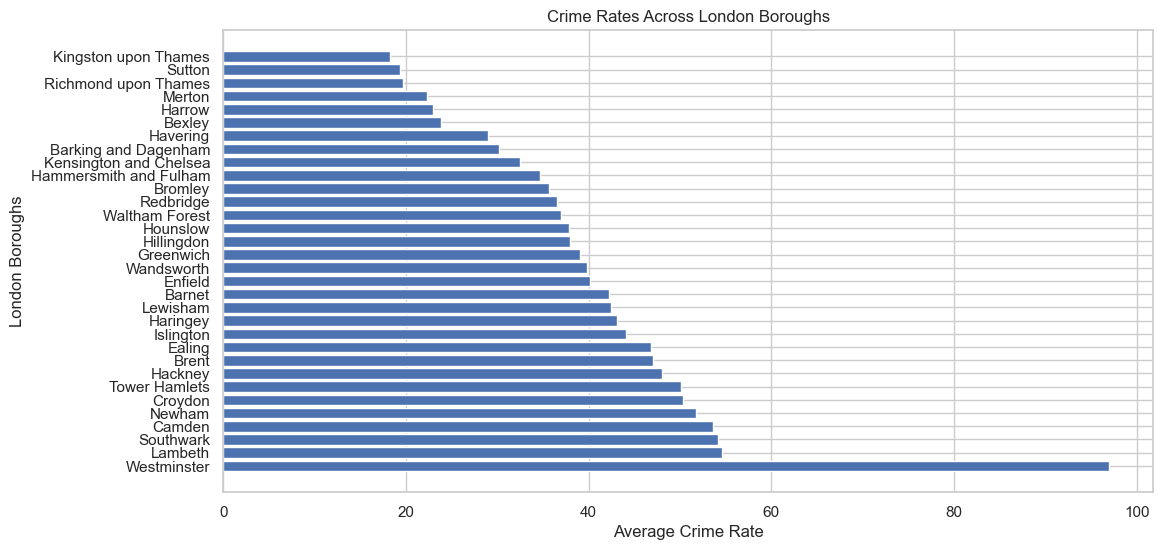

In [156]:
plt.figure(figsize=(12, 6))
plt.barh(borough_crime_rates_sorted['BoroughName'], borough_crime_rates_sorted['Value'])
plt.xlabel('Average Crime Rate')
plt.ylabel('London Boroughs')
plt.title('Crime Rates Across London Boroughs')
plt.gca().invert_yaxis() 
plt.show()

In [157]:
highest_crime_rate = borough_crime_rates_sorted['Value'].max()
lowest_crime_rate = borough_crime_rates_sorted['Value'].min()

highest_crime_boroughs = borough_crime_rates_sorted[borough_crime_rates_sorted['Value'] == highest_crime_rate]
lowest_crime_boroughs = borough_crime_rates_sorted[borough_crime_rates_sorted['Value'] == lowest_crime_rate]

print("Boroughs with the highest crime rate:")
print(highest_crime_boroughs)

print("\nBoroughs with the lowest crime rate:")
print(lowest_crime_boroughs)

Boroughs with the highest crime rate:
    BoroughName      Value
31  Westminster  96.990422

Boroughs with the lowest crime rate:
             BoroughName      Value
19  Kingston upon Thames  18.277589
